<center> <h1> Tic Tac Toe avec le  Monte Carlo tree search </h1> </center>



In [2]:
import numpy as np 
import pandas as pd
import random
from tqdm import tqdm
import pickle


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from mytictactoe import MyTicTacToe

## Jeu interactif

In [3]:
tictactoe = MyTicTacToe(interactive=True)
tictactoe.play()

Player is [X] and computer is [O]
Player starts
  |   |   
---------
  |   |   
---------
  |   |   
---------
# Make your move ! [1-9] : 


 3


O |   | X 
---------
  |   |   
---------
  |   |   
---------
# Make your move ! [1-9] : 


 5


O |   | X 
---------
  | X |   
---------
O |   |   
---------
# Make your move ! [1-9] : 


 4


O |   | X 
---------
X | X | O 
---------
O |   |   
---------
# Make your move ! [1-9] : 


 8


O | O | X 
---------
X | X | O 
---------
O | X |   
---------
# Make your move ! [1-9] : 


 9


O | O | X 
---------
X | X | O 
---------
O | X | X 
---------
%%% Draw! %%%

# Politique déterminée par le  Monte Carlo tree search

In [4]:
tictactoe = MyTicTacToe(interactive=False, policy='mcts')
tictactoe.play()

Player is [X] and computer is [O]
Player starts
  |   |   
---------
  |   |   
---------
  |   |   
---------
# Make your move ! [1-9] : 
  | O |   
---------
  |   |   
---------
X |   |   
---------
# Make your move ! [1-9] : 
X | O |   
---------
O |   |   
---------
X |   |   
---------
# Make your move ! [1-9] : 
X | O |   
---------
O | O |   
---------
X |   | X 
---------
# Make your move ! [1-9] : 
X | O |   
---------
O | O |   
---------
X | X | X 
---------
*** Congratulations ! You won ! ***

# Politique basique 

- Les deux joueurs jouent la même politique basique décrite dans le READ ME

In [4]:
tictactoe = MyTicTacToe(interactive=False, policy='basic')
tictactoe.play()

Player is [X] and computer is [O]
Computer starts
  | O |   
---------
  |   |   
---------
  |   |   
---------
# Make your move ! [1-9] : 
  | O |   
---------
  | O |   
---------
X |   |   
---------
# Make your move ! [1-9] : 
  | O |   
---------
  | O |   
---------
X | X | O 
---------
# Make your move ! [1-9] : 
X | O |   
---------
O | O |   
---------
X | X | O 
---------
# Make your move ! [1-9] : 
X | O | O 
---------
O | O | X 
---------
X | X | O 
---------
%%% Draw! %%%

# Comparisons of performances of the basic policy and the Monte Carlo Tree search policy

In [5]:
#run 1000 games with basic policy
n_games = 1000
res_basic = []
for i in range(n_games):
    tictactoe = MyTicTacToe(interactive=False, policy='basic', verbose=False)
    tictactoe.play()
    res_basic.append(tictactoe.final_result)
    

- Ne pas runner la cellule suivante sauf si vous voulez attendre 35 minutes (avec 16 GB de RAM)

In [4]:
#run 1000 games with monte carlo tree search. 
# it runs 1000 simulations before each move to determine the best one

#res_mcts = []
#for i in tqdm(range(n_games)):
    #tictactoe = MyTicTacToe(interactive=False, policy='mcts', verbose=False)
    #tictactoe.play()
    #res_mcts.append(tictactoe.final_result)
    


100%|██████████| 1000/1000 [35:05<00:00,  2.11s/it]


In [5]:
#pickle.dump(res_mcts, open('mcts_results_optimal', 'wb'))

In [6]:
res_basic = pd.Series(res_basic).value_counts().sort_index()


In [7]:
res_mcts_1000 = pickle.load(open('mcts_results_optimal','rb'))
res_mcts_1000 = pd.Series(res_mcts_1000).value_counts().sort_index()

In [8]:
res = pd.concat([res_basic, res_mcts_1000], axis=1).transpose()
res.fillna(0, inplace=True)
res.columns=['defeat','draw','victory']
res.index = ['basic_agent', 'mcts_agent']
res['average_score'] = (-res['defeat']+res['victory'])/1000
res

,defeat,draw,victory,average_score
basic_agent,180,645,175,-0.005
mcts_agent,1,724,275,0.274


#### Convergence de l'algorithme MCTS
-  Après avoir joué 1000 jeux avec 1000 simulations par coup, on considère qu'on a une bonne estimation des performances optimales moyennes du MCTS
- On cherche à savoir si moins de simulations par coup permet d'atteindre un niveau comparable de performaces

- Idem c'est long à runner. Vous pouvez récupérer les résultats grâce au pickle

In [19]:
#n_games = 1000
#sim = {} #dictionnary with the results for different monte carlo tree

#for n in [10, 50, 100, 500]: #iterate over the possible number of simulations of the tree
    #res_mcts = []
    #for i in tqdm(range(n_games)):
        #tictactoe = MyTicTacToe(interactive=False, n_sim=n, policy='mcts', verbose=False)
        #tictactoe.play()
        #res_mcts.append(tictactoe.final_result)
    #sim['mcts_'+str(n)+'sim'] = res_mcts
    


100%|██████████| 1000/1000 [18:02<00:00,  1.08s/it]


In [20]:
#pickle.dump(sim, open('simulations', 'wb'))

In [9]:
sim = pickle.load(open('simulations', 'rb'))

In [10]:
#add the results to res_data frame
res = pd.concat([res_basic, res_mcts_1000], axis=1).transpose()
res.fillna(0, inplace=True)
res.columns=['defeat','draw','victory']
res.index = ['basic_agent', 'mcts_agent']
res['average_score'] = (-res['defeat']+res['victory'])/1000
res

,defeat,draw,victory,average_score
basic_agent,180,645,175,-0.005
mcts_agent,1,724,275,0.274


In [12]:
res_mcts_10 = sim['mcts_10sim']
res_mcts_10 = pd.Series(res_mcts_10).value_counts().sort_index()

res_mcts_50 = sim['mcts_50sim']
res_mcts_50 = pd.Series(res_mcts_50).value_counts().sort_index()

res_mcts_100 = sim['mcts_100sim']
res_mcts_100 = pd.Series(res_mcts_100).value_counts().sort_index()

res_mcts_500 = sim['mcts_500sim']
res_mcts_500 = pd.Series(res_mcts_500).value_counts().sort_index()

In [13]:
final_results = pd.concat([res_basic, res_mcts_10, 
                           res_mcts_50, res_mcts_100,
                          res_mcts_500, res_mcts_1000], axis=1).transpose()
final_results.fillna(0, inplace=True)
final_results.columns=['defeat','draw','victory']
final_results.index = ['basic_agent', 'mcts_10_agent', 
                       'mcts_50_agent', 'mcts_100_agent',
                      'mcts_500_agent', 'mcts_1000_agent']
final_results['average_score'] = (-final_results['defeat']+final_results['victory'])
final_results

,defeat,draw,victory,average_score
basic_agent,180,645,175,-5
mcts_10_agent,547,261,192,-355
mcts_50_agent,225,512,263,38
mcts_100_agent,115,582,303,188
mcts_500_agent,11,685,304,293
mcts_1000_agent,1,724,275,274


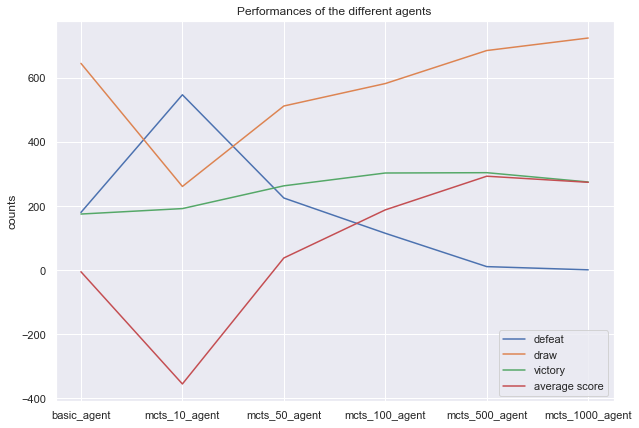

In [14]:
plt.figure(figsize=(10,7))
plt.plot(final_results.index, final_results.defeat, label='defeat')
plt.plot(final_results.index, final_results.draw, label = 'draw')
plt.plot(final_results.index, final_results.victory, label='victory')
plt.plot(final_results.index, final_results.average_score, label='average score')
plt.ylabel('counts')
plt.title('Performances of the different agents')
plt.legend(loc='best')
plt.show()

- Le pire agent en termes de score moyen est le Monte Carlo Tree search qui n'effectue que 10 simulations avant de jouer le coup suivant. Cela est visiblement beaucoup trop peu puisqu'il fait moins bien que l'agent qui joue avec la politique basique.
- A partir de 50 simulations et ce jusqu'à 500, le score moyen augmente. Mais l'on n'observe pas vraiment de différences entre 500 et 1000 simulations.
- Cependant l'algorithme qui utilise 1000 simulations ne perd quasiment plus ! Une seule défaite sur 1000 contre 11 pour celui qui effectue 500 simulations pour détermniner le meilleur coup.
- On remarque aussi que le nombre de matchs nul augmente avec le nombre de simulations et par conséquent le nombre de défaites diminue. Cependant, le nombre de victoires semble approximativement stagner à partir de 100 simulations. Il n'est en effet plus possible pour l'algorithme de s'améliorer en gagnant beaucoup car le jeu Tic Tac Toe est un jeu où il y a souvent matchs nul. En revanche, l'algo s'améliore en transformant les défaites en match nul. Ainsi, vec une politique optimale, on ne perd qu'avec une probabilité extrêmement faible. Mais on ne gagne pas souvent non plus. 